# COMP4131 - Data Modelling and Analysis - Lab 4
# Data Analysis and Modelling

*This notebook was modified from UNUK COMP4030 Data Science with Machine Learning Lab 4 prepared by Nazia Hameed and Jeremie Clos*

**Points from previous labs you absolutely need to be familiar with**:

- read Excel file: `pd.read_excel()`
- read CSV file: `pd.read_csv()`
- rename columns: `df.rename()`
- unique values from a column: `df.unique()`
- duplicated rows: `df.duplicated()`
- drop duplicated rows: `df.drop_duplicates()`
- quantile / percentile: `df.quantile()`
- rows with *NaN*: `df.isna()`
- drop rows with *NaN*: `df.dropna()`
### For tasks you can see the desired output. The purpose of showing output is to help you to write code.

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Getting started with Data Analysis-Importing the Dataset

Let’s begin with data preprocessing on the automobile price prediction dataset. You can download the dataset from Moodle. Alternatively, the dataset can be downloaded from the UCI dataset repository using the following link: [UCI Auto Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/). 

You will need to convert the data into `.csv` format and add headers, as they are not included. To do this, create a list of headers as follows:

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
         
Then use `dataframe.columns = headers` to replace the headers with the list you have created.

Lets get started by reading the dataset available on the moodle. 

In [43]:
# Read the csv file 
df = pd.read_csv('rawautodata.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Since the headers are available in a separate file, they need to be added manually.  

**Task:** Add headers to the dataframe and display the first five records.

In [44]:
#Write your code here
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
         
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Pre-processing/Data Cleaning/Data Wrangling

Data wrangling is the process of cleaning, structuring, and enriching raw data into a format that is more suitable for analysis. Pre-processing data can make it more meaningful and easier to work with. 

If you recall from Lab 2, to replace `?` with `NaN`, the `.replace(A, B, inplace=True)` function is used. Using the `inplace=True` argument in pandas modifies the underlying data directly, meaning it mutates the actual object you apply it to.

**Task:** Replace all `?` with `NaN` and display the first 10 records.

In [45]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


After replacing `?` with `NaN`, you need to evaluate the missing data. There are two methods to detect missing data:

- **`.isnull()`**  
- **`.notnull()`**  

The output of these methods is a boolean value indicating whether the value passed into the argument is missing or not.

In [46]:
missingdata = df.notnull()
missingdata.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In the output above, `True` indicates that the data is not missing, while `False` indicates that the data is missing. Recalling from Lab 2, there are several ways to handle missing data, as outlined below:

### **Drop Data**
- Drop the entire row.
- Drop the entire column.

### **Replace Data**
- Replace missing values with the mean.
- Replace missing values with the most frequent value (mode).
- Replace missing values based on other functions or logic.

If desired, you can count the number of missing values for each column and then decide how to handle them. You can use the `value_counts()` method to count the number of missing values. For example, the number of missing values in the `normalized-losses` column can be determined as follows:

In [47]:
print(missingdata['normalized-losses'].value_counts())

normalized-losses
True     164
False     41
Name: count, dtype: int64


In the above example, you can see that 41 values are missing from the normalized-losses. Similarly you can find the missing values for each column. <br>
Lets find the missing values for each column. <br>

In [48]:
missingdata = df.notnull()
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("") 

symboling
symboling
True    205
Name: count, dtype: int64

normalized-losses
normalized-losses
True     164
False     41
Name: count, dtype: int64

make
make
True    205
Name: count, dtype: int64

fuel-type
fuel-type
True    205
Name: count, dtype: int64

aspiration
aspiration
True    205
Name: count, dtype: int64

num-of-doors
num-of-doors
True     203
False      2
Name: count, dtype: int64

body-style
body-style
True    205
Name: count, dtype: int64

drive-wheels
drive-wheels
True    205
Name: count, dtype: int64

engine-location
engine-location
True    205
Name: count, dtype: int64

wheel-base
wheel-base
True    205
Name: count, dtype: int64

length
length
True    205
Name: count, dtype: int64

width
width
True    205
Name: count, dtype: int64

height
height
True    205
Name: count, dtype: int64

curb-weight
curb-weight
True    205
Name: count, dtype: int64

engine-type
engine-type
True    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
True    205
Name: count, dtyp

We will replace the missing values of normalized-losses with average value i.e. mean. 


In [49]:
mean_normloss = df["normalized-losses"].astype("float").mean()
df["normalized-losses"] = df["normalized-losses"].astype("float").replace(np.nan, mean_normloss)
missingdata = df.notnull()
print (missingdata['normalized-losses'].value_counts())

normalized-losses
True    205
Name: count, dtype: int64


After replacing `NaN` values for `normalized-losses`, we again check for missing values. You will notice that there are no missing values now.  

**Task:** For the following columns in our dataset, replace the missing values with the average value (i.e., the mean):  
- `stroke`  
- `bore`  
- `horsepower`  
- `peak-rpm`  

In [50]:
#Write your code here
col_list = ['stroke', 'bore', 'horsepower', 'peak-rpm']

for col in col_list:
    mean = df[col].astype("float").mean()
    df[col] = df[col].astype("float").replace(np.nan, mean)

missingdata = df.notnull()
for col in col_list:
    print (missingdata[col].value_counts())
    print()

stroke
True    205
Name: count, dtype: int64

bore
True    205
Name: count, dtype: int64

horsepower
True    205
Name: count, dtype: int64

peak-rpm
True    205
Name: count, dtype: int64



If you observe the dataset, you will find that the num-of-doors is non-numeric hence you cannot take mean. Let's calculate the frequencies of items. You can use counter function. Other alternatives to calculate frequency are `value_counts()` and `idxmax()`.

In [51]:
from collections import Counter
Counter(df["num-of-doors"])

Counter({'four': 114, 'two': 89, nan: 2})

From the above output, you can see that four doors is most frequent occuring value, so we will replace the missing values in `num-of-doors` with four. 

**Task** Replace the NaN value with four for "num-of-doors"

In [52]:
#Write your code here
df['num-of-doors'].replace(np.nan, 'four', inplace=True)
Counter(df["num-of-doors"])

/var/folders/bb/glsc2_990ys6t9vhq_rv4qmh0000gn/T/ipykernel_3604/1564434036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan, 'four', inplace=True)


Counter({'four': 116, 'two': 89})

Since our final goal is to predict the price, rows where the `price` is missing are not useful for training and testing the model. Therefore, we will drop the rows where the `price` value is missing.  

**Task:** Recall the `dropna()` function from Lab 2 and use it to drop the rows with missing `price` values.

In [53]:
#Write your code here
print(df['price'].isna().any())

df.dropna(subset=['price'], inplace=True)

print(df['price'].isna().any())

True
False


You may wish to reset the id's as some rows are droped from the dataset. To reset the index you can use `reset_index`

In [54]:
# 重置索引并丢弃旧索引
df = df.reset_index(drop=True)

**Task** Display the bottom 10 rows of the dataframe

In [55]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
191,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,13415
192,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985
193,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515
194,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420
195,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


If you want you can check if you still have any missing values.

In [56]:
missingdata = df.notnull()
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")

symboling
symboling
True    201
Name: count, dtype: int64

normalized-losses
normalized-losses
True    201
Name: count, dtype: int64

make
make
True    201
Name: count, dtype: int64

fuel-type
fuel-type
True    201
Name: count, dtype: int64

aspiration
aspiration
True    201
Name: count, dtype: int64

num-of-doors
num-of-doors
True    201
Name: count, dtype: int64

body-style
body-style
True    201
Name: count, dtype: int64

drive-wheels
drive-wheels
True    201
Name: count, dtype: int64

engine-location
engine-location
True    201
Name: count, dtype: int64

wheel-base
wheel-base
True    201
Name: count, dtype: int64

length
length
True    201
Name: count, dtype: int64

width
width
True    201
Name: count, dtype: int64

height
height
True    201
Name: count, dtype: int64

curb-weight
curb-weight
True    201
Name: count, dtype: int64

engine-type
engine-type
True    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
True    201
Name: count, dtype: int64

engine-size
engine

Great! There are no more missing values in the dataset. After removing all the missing values you may want to save this dataset. If you want to save the dataset you can use `df.to_csv()`. Alternatively, you can also save the dataset after applying data normalisation.

In [57]:
df.to_csv('data_stage1.csv')

## Data Normalisation
Normalisation is a technique often applied as part of data preparation for machine learning. The goal of normalisation is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. We learned different data normalisation techniques in Lab 2 such as Min-max normalisation,standard score, simple feature scaling etc.  

**Task** Normalise the length, width and height  using the min-max normalisation and display length, width and height of first five records.

**Hint: Min-Max Normalisation Formula**<br>
$$
\frac{X - X_{min}}{X_{max}-X_{min}}
$$


In [58]:
col_list = ['length', 'width', 'height']

for col in col_list:
    df[col] = (
        (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    )

df[col_list].head()

,length,width,height
0,0.413433,0.324786,0.083333
1,0.413433,0.324786,0.083333
2,0.449254,0.444444,0.383333
3,0.529851,0.504274,0.541667
4,0.529851,0.521368,0.541667


Now we can see that length, width and height are now normalised and are in 0-1 range. 

Lets observe our data further and visualise the horse power. 


In [59]:
df['horsepower'].describe()

count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [60]:
df['horsepower'].nunique()

59

We can see that "horsepower" is a real valued variable ranging from 48 to 262 and it has 59 unique values. Lets now try to visualise this data.

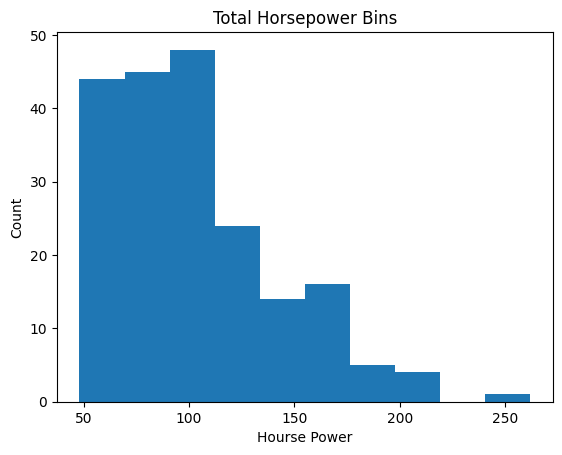

In [61]:
df["horsepower"]=df["horsepower"].astype(int)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("Hourse Power")
plt.ylabel("Count")
plt.title("Total Horsepower Bins")
plt.show()

## Binning

Binning is a technique used to group a set of more or less continuous values into a smaller number of "bins." This process can convert continuous data into a discrete number of bins (e.g., 3 bins) to make the data distribution more understandable. Sometimes, binning can also help improve model accuracy. To create bins, you can use the `linspace` function.

We can apply the `cut()` function to determine the bin for each `horsepower` value. The `pandas.cut()` function is used to separate array elements into different bins [1].

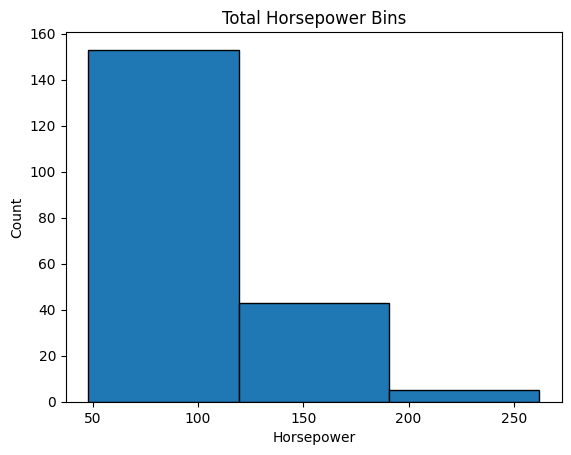

In [62]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) # 4表示划四道线 即三个分组
group_names = ['Low', 'Medium', 'High']

# pd.cut() 将 horsepower 数据根据指定的 bins 进行分箱
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

plt.hist(df["horsepower"], bins=bins, edgecolor="black")  # Use the same bins for consistency

# Set x/y labels and plot title
plt.xlabel("Horsepower")  # Fixed typo
plt.ylabel("Count")
plt.title("Total Horsepower Bins")

# Display the plot
plt.show()

Regression analysis requires numerical variables. Therefore, if you want to include categorical variables in a regression model, additional steps are needed to make the results interpretable. In these steps, the categorical variables are recoded into a set of separate binary variables. This process is called **dummy coding**. 

In Python, you can use the `get_dummies()` function to assign numerical values to different categorical data. Let’s perform dummy coding on the `fuel-type` column.

In [63]:
# get_dummies() 将每个唯一值（类别）转换为一个新的列，并使用 0 或 1 表示其存在与否。
dummy_fueltype = pd.get_dummies(df["fuel-type"])
print(dummy_fueltype)

     diesel    gas
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
..      ...    ...
196   False   True
197   False   True
198   False   True
199    True  False
200   False   True

[201 rows x 2 columns]


If you want to give a meaning ful name to the dummy fuel type you can do it using the following code. We are skipping it for now. 

`dummy_fueltype.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)`

After calculating the dummy values, you need to concatenate the dummy variable with the existing data and drop the existing fuel-type parameter as well. 

In [64]:
df = pd.concat([df, dummy_fueltype], axis=1)
df = df.drop("fuel-type", axis=1)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000.0,21,27,13495,Low,False,True
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,2.68,9.0,111,5000.0,21,27,16500,Low,False,True
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,3.47,9.0,154,5000.0,19,26,16500,Medium,False,True
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.529851,...,3.40,10.0,102,5500.0,24,30,13950,Low,False,True
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.529851,...,3.40,8.0,115,5500.0,18,22,17450,Low,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,3.15,9.5,114,5400.0,23,28,16845,Low,False,True
197,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,3.15,8.7,160,5300.0,19,25,19045,Medium,False,True
198,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,2.87,8.8,134,5500.0,18,23,21485,Medium,False,True
199,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,3.40,23.0,106,4800.0,26,27,22470,Low,True,False


**Task** Create a dummy variable for "aspiration". Drop the existing column and append the new one with the existing list.


In [65]:
dummy_asp = pd.get_dummies(df["aspiration"])
df = pd.concat([df, dummy_asp], axis=1)
df = df.drop("aspiration", axis=1)
df


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111,5000.0,21,27,13495,Low,False,True,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111,5000.0,21,27,16500,Low,False,True,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,154,5000.0,19,26,16500,Medium,False,True,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,102,5500.0,24,30,13950,Low,False,True,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,...,115,5500.0,18,22,17450,Low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.711940,0.735043,...,114,5400.0,23,28,16845,Low,False,True,True,False
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.711940,0.726496,...,160,5300.0,19,25,19045,Medium,False,True,False,True
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.711940,0.735043,...,134,5500.0,18,23,21485,Medium,False,True,True,False
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.711940,0.735043,...,106,4800.0,26,27,22470,Low,True,False,False,True


In [66]:
df.to_csv('data_stage2.csv')

You can save the processed data now. After data-pre-processing we will move towards the Exploratory Data Analysis <br>
## 3. Exploratory Data Analysis (EDA) 
EDA is used by data scientists to analyse and investigate data sets and summarise their main characteristics, often employing data visualisation methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

You should define meaning research question before exploring the data. In this lab our main target is to find the most meaningful features for predicting the car price.

The first thing to start is with exploring the datatypes of the data. There can be different type of data in any dataset. The type of data in the pandas dataframe could be float64, int64, datetime64 and object. You can check the datatype of data using `df.dtypes`. 

In [67]:
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                  object
horsepower-binned    category
diesel                   bool
gas                      bool
std                      bool
turbo                    bool
dtype: object

If you check the values in the CSV file, you will notice that some of the data types do not match the data stored in the file. We need to change the data types of these columns. To change the data type, you can use the `.astype()` function. 

Continuing with the observation of data types, the `bore` and `stroke` variables contain numerical values. Therefore, their data type should be either `int` or `float`. However, as you can see in the output above, their data type is currently `object`. We will change their data type accordingly.

In [68]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

**Task**: Explore the data and find the columns with mismatched datatype and convert them to their appropriate datatype.<br> 
**Hint** Mismatched datatype columns:normalized-losses,price,peak-rpm

In [69]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("int")

Now check th datatypes again to verify that the datatype of each column is correct. 

In [70]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm                int64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
diesel                   bool
gas                      bool
std                      bool
turbo                    bool
dtype: object

There are some other methods as well to get some information about the dataset such as `df.info()`.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

## Correlation 

Correlation analysis measures the statistical relationship between two different variables. The result shows how a change in one parameter impacts the other parameter.  
It can be described as positive, negative, or no correlation.  

- A **positive correlation** occurs when the variable on the x-axis increases as the variable on the y-axis increases.  
- A **negative correlation** occurs when one variable increases while the other variable decreases.  

### **Pearson Correlation**  
The Pearson correlation measures the linear dependence between two variables, X and Y. It provides two key values:  

1. **Correlation coefficient**  
2. **p-value**  

#### **1. Correlation Coefficient**  
The correlation coefficient is a value between -1 and 1, inclusive, where:  

- **1**: Perfect positive linear correlation.  
- **0**: No linear correlation; the two variables likely do not affect each other.  
- **-1**: Perfect negative linear correlation.  

We can calculate the correlation of `'int64'` or `'float64'` variables.  
In Python, correlation can be found using the `corr()` function.


In [72]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279739,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360301,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285973,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245803,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309971,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279360,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256734,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267395,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063577,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


If you want to find the correlation between a set of columns, you can use the following syntax:  

```python
df[['column1', 'column2', 'column3']].corr()

```

**Task** Find the correlation between the following columns in the dataset bore, stroke, compression-ratio, and horsepower.

In [73]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Regplot  

As we are finding suitable variables to predict car price, the target variable in our dataset is `price`.  
To understand the (linear) relationship between an individual variable and `price`, you can use `regplot`.  

The `regplot` function generates a scatter plot with a regression line.  
Let's plot the `regplot` of **engine-size** and **price**.


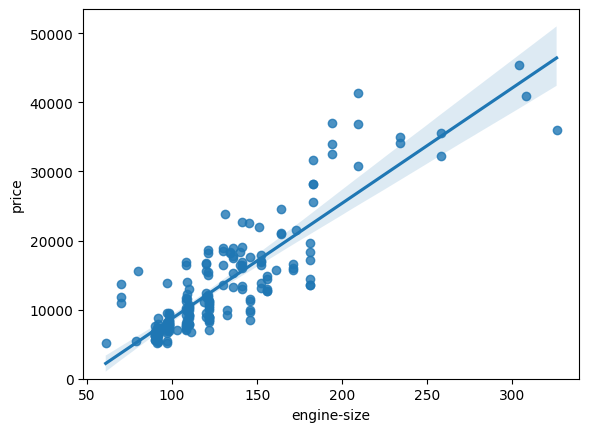

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()

From the regplot we can see that there is positive correlation between engine-size and pice i.e. if the value of engine-size goes up, the value of price will also go up. Lets calculate the correlation value among these two.

In [75]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


From the output we can see that correlation value is 0.87. which means that engine-size is a meaningful variable to predict the price. 

**Task** Display the regplot for highway-mpg and price. Also find the correlation value.

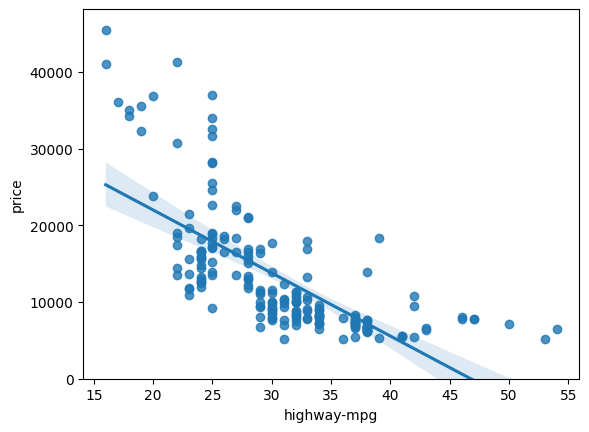

In [76]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

In [77]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


From the regplot of "highway-mpg" and "Price", we can see that there is negative correlation between these two i.e. when the value of highway-mpg increases, the price of the car decreases. The correlation value of -.70 indicates that this is another meaningful parameter for pridicting car price. Lets look at the example of weak correlation.

<Axes: xlabel='stroke', ylabel='price'>

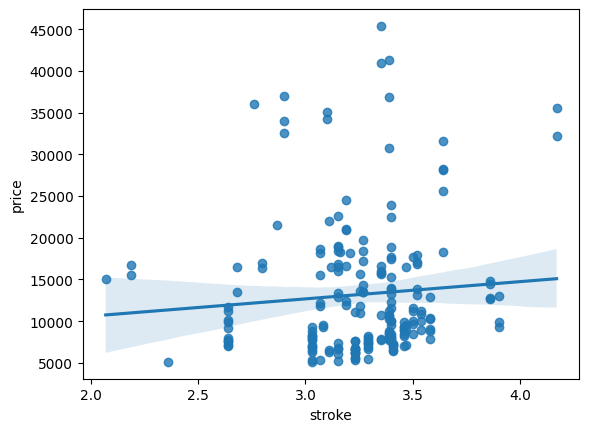

In [78]:
sns.regplot(x="stroke", y="price", data=df)

In [79]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


From the reg plot and the correlation price, we can see that there is a weak correlation between the stroke and price. 

**Task** Find the correlation of each numeric variable with price.

In [80]:
NumericalParameters = ["symboling","normalized-losses","wheel-base", "length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","diesel","gas","std","turbo"]
for column in NumericalParameters:
   print(column, ':\t', df[[column,'price']].corr().iloc[0, 1])
   print()

symboling :	 -0.08239118716962372

normalized-losses :	 0.1339987342927434

wheel-base :	 0.5846418222655072

length :	 0.6906283804483645

width :	 0.7512653440522675

height :	 0.13548630756805993

curb-weight :	 0.8344145257702853

engine-size :	 0.8723351674455183

bore :	 0.5431553832626603

stroke :	 0.08226928855325766

compression-ratio :	 0.07110732668194143

horsepower :	 0.8096068016571053

peak-rpm :	 -0.10161237413760969

city-mpg :	 -0.6865710067844681

highway-mpg :	 -0.7046922650589529

diesel :	 0.11032556467564868

gas :	 -0.11032556467564869

std :	 -0.17957848135197427

turbo :	 0.17957848135197424



Sometimes, we want to determine the significance of a correlation estimate.

### **P-value**  
The **p-value** represents the probability that the correlation between two variables is statistically significant.  

- If this probability is lower than the conventional **5% (p < 0.05)**, the correlation coefficient is considered **statistically significant**.  
- However, it is important **not to confuse correlation with causation**.  
  - When two variables are correlated, there may or may not be a causal connection.  
  - The connection could be **indirect** or due to other underlying factors.  
  - Correlation can only suggest causation when there is a **logical (e.g., biological) basis** for such an interpretation.  

### **95% Confidence Interval (CI) for the Pearson Correlation Coefficient**  
The **95% confidence interval** represents the range of values that contains the "true" correlation coefficient with 95% confidence.  

### **Interpreting the p-value**  
By convention:  

- **p-value < 0.001** → Strong evidence that the correlation is significant.  
- **p-value < 0.05** → Moderate evidence that the correlation is significant.  
- **p-value < 0.1** → Weak evidence that the correlation is significant.  
- **p-value > 0.1** → No evidence that the correlation is significant.  


In python you can calculate the peason correlation using `scipy.stats`module. lets calulate the pearson correlation between engine-size and price.

- **correlation coefficient** 可以告诉我们它们之间的相关强度，但这并不足以判断这种相关性是否显著。
- **p-value** 是衡量这种相关性是否具有统计学显著性的重要指标。

In [81]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


**Task** Calculate the Pearson Correlation Coefficient and P-value of each numeric variable with price. Find a list of meaningful numeric parameters for predicting car price.

In [82]:
NumericalParameters = ["symboling","normalized-losses","wheel-base", "length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","diesel","gas","std","turbo"]
meaningful_param = []

for column in NumericalParameters:
    pearson_coef, p_value = stats.pearsonr(df[column], df['price'])
    print(column, ": \tCorrelation =", pearson_coef, "\tP-value", p_value)
    print()
    if p_value < 0.05:
        meaningful_param.append(column)

print('Meaningful parameters are:', meaningful_param)

symboling : 	Correlation = -0.08239118716962357 	P-value 0.24491487657164737

normalized-losses : 	Correlation = 0.1339987342927434 	P-value 0.057897493527031385

wheel-base : 	Correlation = 0.5846418222655081 	P-value 8.076488270732887e-20

length : 	Correlation = 0.6906283804483642 	P-value 8.016477466158871e-30

width : 	Correlation = 0.7512653440522673 	P-value 9.200335510482058e-38

height : 	Correlation = 0.13548630756805974 	P-value 0.0551462732510123

curb-weight : 	Correlation = 0.8344145257702845 	P-value 2.189577238893965e-53

engine-size : 	Correlation = 0.8723351674455185 	P-value 9.265491622198793e-64

bore : 	Correlation = 0.5431553832626603 	P-value 8.049189483935319e-17

stroke : 	Correlation = 0.08226928855325812 	P-value 0.2456161248774578

compression-ratio : 	Correlation = 0.07110732668194146 	P-value 0.31581101887292395

horsepower : 	Correlation = 0.8096068016571054 	P-value 6.273536270650352e-48

peak-rpm : 	Correlation = -0.10161237413760973 	P-value 0.15119107

## Categorical Data
To visualise the categorical data, you can use boxplots. Lets look at the relationship between the 'body-style' and 'price'. As you learned from lab 3 that boxplot can be plotted using seaborn library as follows: 

<Axes: xlabel='body-style', ylabel='price'>

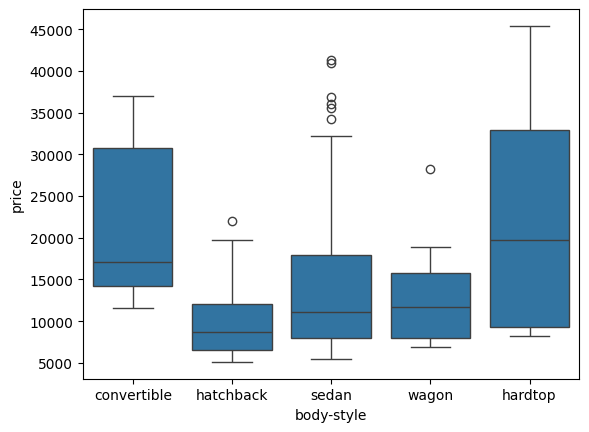

In [83]:
sns.boxplot(x="body-style", y="price", data=df)

We see clearly visualise from the boxplot that different body-style categories have a **significant overlap**, so body-style would not be a good predictor of price. Lets explore other categorical parameters. <br>
**Task** Visualise the relationship between engine-location,drive-wheels using box plot and determine either they are good parameters for predicting car price or not. 

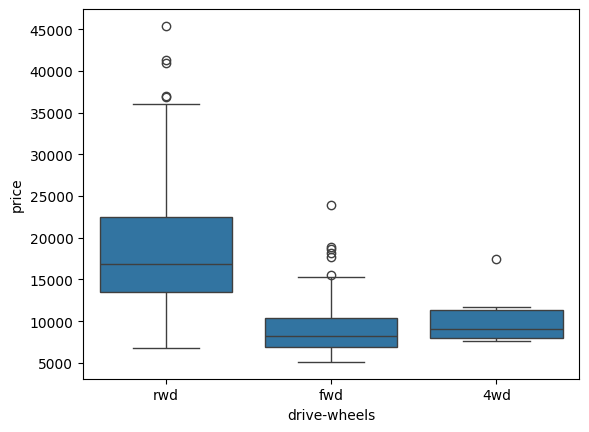

In [84]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

We can see from the box plot that the distribution of price between the different drive-wheels categories differs. This indicates that the drive-wheels could potentially be a predictor of price.

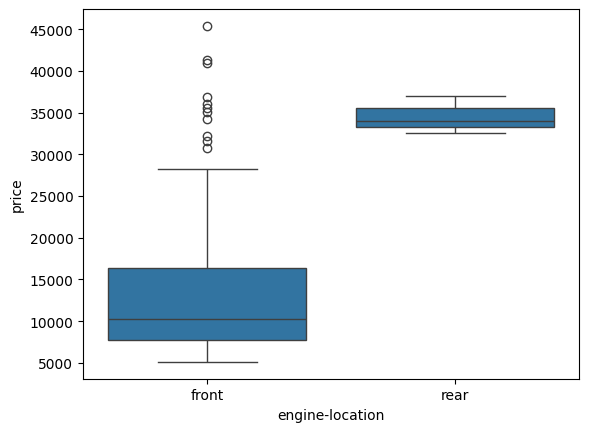

In [85]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

We can see from the box plot that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

## Descriptive Statistical Analysis

To get statistical summary of the every column you can use `df.describe()`. The describe() method returns description of the data (exluding NaN) in the DataFrame.describe method will provide the following information for ecah column.<br> 
count - The number of not-empty values.<br>
mean - The average (mean) value.<br>
std - The standard deviation.<br>
min - the minimum value.<br>
25% - The 25% percentile<br>
50% - The 50% percentile<br>
75% - The 75% percentile<br>
max - the maximum value<br>


In [86]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.494045,0.477697,0.497222,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.661692,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,0.183913,0.179613,0.203985,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113747,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,0.000000,0.000000,0.000000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,0.383582,0.324786,0.350000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,0.479104,0.444444,0.525000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,0.632836,0.538462,0.641667,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


By default, `describe()` provides the statistical summary of all **numeric** (`int`, `float`) columns.  

If you want to check the statistical summary of **object-type** columns, you need to add the argument `include="all"`.  

When you use `include="all"`, you will get additional information such as:  
- **count**: Number of non-null values  
- **unique**: Number of unique values  
- **top**: Most frequently occurring value  
- **freq**: Frequency of the most occurring value  

While using `df.describe(include="all")`, some values in the table may be displayed as `"NaN"`.  
This happens because certain statistics are **not applicable** to specific column types.  

If you want basic statistics **only for object-type variables**, you can use:  

```python
df.describe(include=['object'])


In [87]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


**As shown below, for each categorical parameter, there are significant overlap between each values. Therefore all of them are not appropriate parameters for predicting prices.**

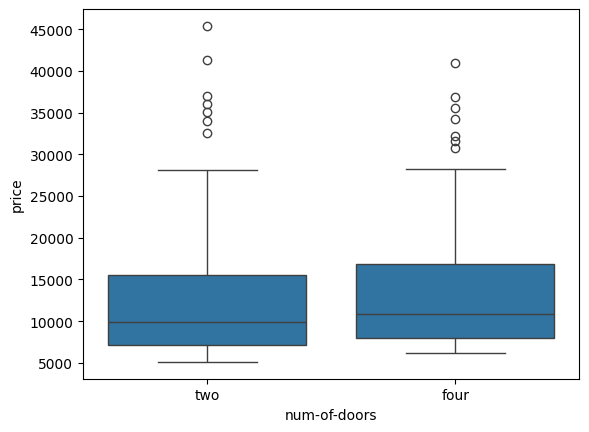

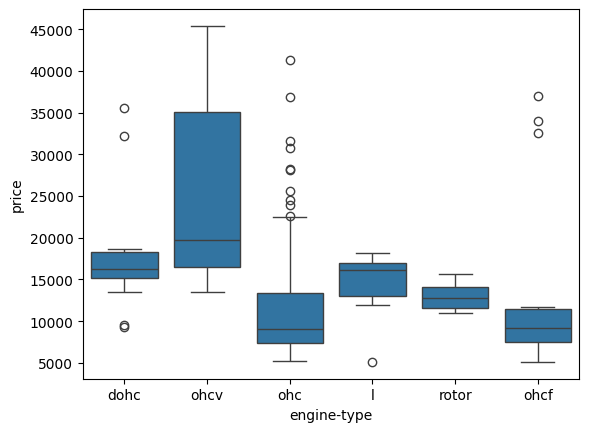

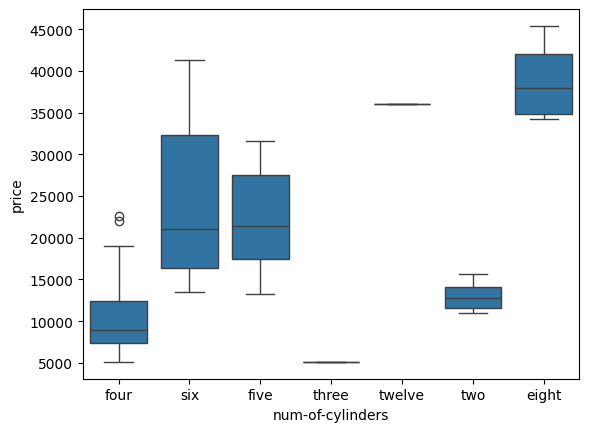

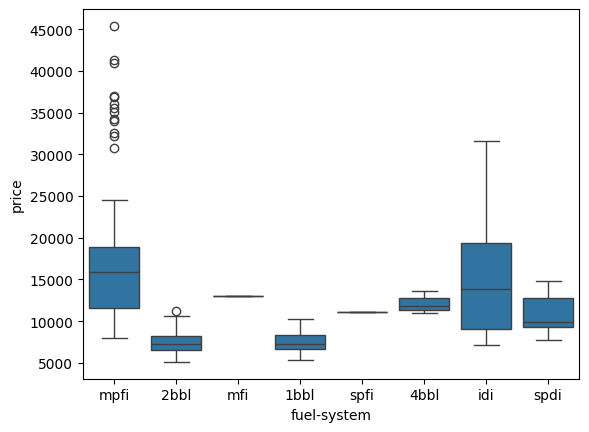

In [88]:
sns.boxplot(x="num-of-doors", y="price", data=df)
plt.show()

sns.boxplot(x="engine-type", y="price", data=df)
plt.show()

sns.boxplot(x="num-of-cylinders", y="price", data=df)
plt.show()

sns.boxplot(x="fuel-system", y="price", data=df)
plt.show()

**Task** After finishing the EDA process, list down the meaningful parameters for predicting the price of the car. 

In [89]:
meaningful_param

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'std',
 'turbo']

**Since the column `std` and `turbo` have very low correlations with `price`, which are both approximately `0.17`, therefore I don't consider these two as meaningful parameters for predicting prices.**

**Continuous numerical variables:**
`wheel-base`, `length`, `width`, `curb-weight`, `engine-size`, `bore`, `horsepower`, `city-mpg`, `highway-mpg`

**Categorical variables:**
`engine-location`, `drive-wheels`

# References 

[1]Pandas.cut() method in Python, available at "https://www.geeksforgeeks.org/pandas-cut-method-in-python/", retrived on 27th Feburary 2023 <br>
[2] EDA – correlation analysis, available at "https://tinyurl.com/bddbtm8k", retrived on 27th Feburary 2023 <br>
[3].Pearson correlation, available at "https://tinyurl.com/yckmx5wa", retrived on 27th Feburary 2023 <br>